# Ethiopia EDA of county-level maize yield data from South Sudan


Data is taken from [this Github](https://github.com/AnnaXWang/deep-transfer-learning-crop-prediction). This notebook shows basic plots of the data to assess suitability for predicting crop yield from remote sensing data.

Data covers Meher harvests for 2001 - 2016, with crop yield given at the zone level (administrative level 2).

Ethiopia is a much bigger country than Senegal by area.

Total land area of Ethiopia is 1,140,000 km$^2$, divided into 46 zones, so 24,000 km$^2$ each on average.

Total land area of Senegal is 197,000 km$^2$, divided into 45 departments, so 4,400 km$^2$ each on average.

# Load data and examine


In [243]:
import pandas as pd
import requests
import folium
import matplotlib.pyplot as plt
import math
import time
import numpy as np

In [157]:
eth = pd.read_csv("https://github.com/AnnaXWang/deep-transfer-learning-crop-prediction/raw/master/code/static_data_files/ethiopia_yields_raw.csv")
eth.head()

,Unnamed: 0,Data Source Organization,Data Source Document,Country,FNID_mod,Admin 1,Admin2_mod,Pop_group,Year,Season,Crop,DNL Name of Crop in FDW,DNL Name of Crop in source,DNL Original harvest year,AreaPlanted_ha,QuantityProduced_mt,DNLQuantityProduced,Yield_mt_ha
0,1,"CSA, Ethiopia","Agricultural Sample Enumeration, 2001-2002, Et...",ET,ET1994A20730,SNNPR,North Omo,NaN,2002,Meher,1122,Maize,Maize,2001/2002,39929.09,65062.371,NaN,1.629448
1,2,"CSA, Ethiopia","Agricultural Sample Enumeration, 2001-2002, Et...",ET,ET1994A20731,SNNPR,Keficho Shekicho,NaN,2002,Meher,1122,Maize,Maize,2001/2002,19652.22,38698.123,NaN,1.969148
2,3,"CSA, Ethiopia","Agricultural Sample Enumeration, 2001-2002, Et...",ET,ET2001A20106,Tigray,West Tigray,NaN,2002,Meher,1122,Maize,Maize,2001/2002,23712.84,46653.097,NaN,1.967419
3,4,"CSA, Ethiopia","Agricultural Sample Enumeration, 2001-2002, Et...",ET,ET2001A20426,Oromia,Borena,NaN,2002,Meher,1122,Maize,Maize,2001/2002,27669.85,44483.551,NaN,1.607654
4,5,"CSA, Ethiopia","Agricultural Sample Enumeration, 2001-2002, Et...",ET,ET2001A20427,Oromia,West Shewa,NaN,2002,Meher,1122,Maize,Maize,2001/2002,72474.91,204138.874,NaN,2.816683


In [158]:
# How many countries listed?
print("Countries:\n")
print(eth["Country"].value_counts(dropna=False))

Countries:

ET    666
Name: Country, dtype: int64


In [159]:
# What level 1 areas are listed?
print(len(set(eth["Admin 1"])), "regions listed in total")
print("\nRegions (level 1):\n")
print(eth["Admin 1"].value_counts(dropna=False))

11 regions listed in total

Regions (level 1):

SNNPR               152
Oromia              140
Amhara              139
Tigray               55
Somali               48
Benshangul Gumuz     35
Afar                 29
Harari               23
Gambela              21
Dire Dawa            18
Addis Ababa           6
Name: Admin 1, dtype: int64


In [160]:
# What level 2 areas are listed?
print(len(set(eth["Admin2_mod"])), "zones listed in total")
print("\nAll zones (level 2):\n")
print(eth["Admin2_mod"].value_counts(dropna=False))

for region in set(eth["Admin 1"]):
  print("\nZones in", region, ":")
  print(eth["Admin2_mod"][eth["Admin 1"]==region].value_counts(dropna=False))



46 zones listed in total

All zones (level 2):

NaN                            79
North Shewa                    26
Dire Dawa                      14
Harari                         14
Kembata Alaba Tembaro\r\r\n    13
Metekel                        13
Bench Maji                     13
Yem                            13
Oromia                         13
Jimma                          13
Ilubabor                       13
West Hararge                   13
West Wellega                   13
East Hararge                   13
West Shewa                     13
Oromia Regroup                 13
Jijiga                         13
West Tigray                    13
Gedeo                          13
South Gondar                   13
Central Tigray                 13
East Gojam                     13
East Tigray                    13
South Omo                      13
South Wollo                    13
Segen                          13
Shinile                        13
East Wellega                   13


In [161]:
print("Seasons:\n")
print(eth["Season"].value_counts(dropna=False))

Seasons:

Meher    589
Belg      77
Name: Season, dtype: int64


In [162]:
# What crops are listed?

print("Crop IDs:")
print(eth["Crop"].value_counts(dropna=False))

print("\nCrop names:")
print(eth["DNL Name of Crop in FDW"].value_counts(dropna=False))

print("\nCrop names:")
print(eth["DNL Name of Crop in source"].value_counts(dropna=False))

Crop IDs:
1122    666
Name: Crop, dtype: int64

Crop names:
Maize    666
Name: DNL Name of Crop in FDW, dtype: int64

Crop names:
Maize    666
Name: DNL Name of Crop in source, dtype: int64


In [163]:
# What years are listed?

print("Year:")
print(eth["Year"].value_counts(dropna=False))

print("\nHarvest year:")
print(eth["DNL Original harvest year"].value_counts())

print("\nYears for Meher season:")
print(eth["Year"].loc[eth["Season"]=="Meher"].value_counts(dropna=False))

print("\nYears for Belg season:")
print(eth["Year"].loc[eth["Season"]=="Belg"].value_counts(dropna=False))

print("\nHarvest years for Meher season:")
print(eth["DNL Original harvest year"].loc[eth["Season"]=="Meher"].value_counts(dropna=False))

print("\nHarvest years for Belg season:")
print(eth["DNL Original harvest year"].loc[eth["Season"]=="Belg"].value_counts(dropna=False))

Year:
2009    55
2016    54
2015    53
2008    53
2013    52
2012    52
2011    50
2007    46
2006    46
2005    46
2004    46
2002    46
2001    46
2010    13
2014     8
Name: Year, dtype: int64

Harvest year:
2008/2009    55
2016         54
2007/2008    53
2014/2015    53
2011/2012    52
2012/2013    52
2010/2011    50
2000/2001    46
2001/2002    46
2005/2006    46
2003/2004    46
2006/2007    46
2004/2005    45
2009/2010    13
2013/2014     8
Name: DNL Original harvest year, dtype: int64

Years for Meher season:
2007    46
2006    46
2005    46
2004    46
2002    46
2001    46
2016    45
2009    45
2008    45
2015    44
2013    44
2012    44
2011    43
2010     3
Name: Year, dtype: int64

Years for Belg season:
2010    10
2009    10
2016     9
2015     9
2014     8
2013     8
2012     8
2008     8
2011     7
Name: Year, dtype: int64

Harvest years for Meher season:
2001/2002    46
2005/2006    46
2003/2004    46
2006/2007    46
2000/2001    46
2008/2009    45
2007/2008    45
2016  

In [164]:
# What is pop_group?
print("Pop group:")
print(eth["Pop_group"].value_counts(dropna=False))

Pop group:
NaN    666
Name: Pop_group, dtype: int64


In [165]:
# Where does the data come from?
print("Organisations:\n")
print(eth["Data Source Organization"].value_counts(dropna=False))

print("\nDocuments:\n")
print(eth["Data Source Document"].value_counts(dropna=False))

Organisations:

CSA, Ethiopia    666
Name: Data Source Organization, dtype: int64

Documents:

CSA, 2015, Ethiopia                                          336
CSA, 2016, Ethiopia                                           54
Agricultural Sample Enumeration, 2001-2002, Ethiopia          45
Agricultural Sample Survey, 2003-2004, Ethiopia               45
Agricultural Sample Survey, 2006-2007, Ethiopia               44
Agricultural Sample Survey, 2005-2006, Ethiopia               44
Agricultural Sample Survey, 2000-2001, Ethiopia               43
Agricultural Sample Survey, 2004-2005, Ethiopia               43
Agricultural Sample Survey, 1995-1996/2014-2015, Ethiopia     12
Name: Data Source Document, dtype: int64


In [166]:
# What regions and zones do the FNIDs correspond to?
for x in sorted(set(eth["FNID_mod"])):
  print("\n FNID", x)
  print(eth[["Admin 1", "Admin2_mod", "Season", "DNL Original harvest year"]].loc[eth["FNID_mod"]==x])

# Any rows without a FNID?
print("Rows without a FNID")
eth[eth["FNID_mod"].isna()]


 FNID ET1994A20730
    Admin 1 Admin2_mod Season DNL Original harvest year
0     SNNPR  North Omo  Meher                 2001/2002
57    SNNPR  North Omo  Meher                 2000/2001
100   SNNPR  North Omo  Meher                 2003/2004
145   SNNPR  North Omo  Meher                 2004/2005
188   SNNPR  North Omo  Meher                 2005/2006
232   SNNPR  North Omo  Meher                 2006/2007
276   SNNPR  North Omo  Meher                 2007/2008
277   SNNPR  North Omo  Meher                 2008/2009
278   SNNPR  North Omo  Meher                 2010/2011
279   SNNPR  North Omo  Meher                 2011/2012
280   SNNPR  North Omo  Meher                 2012/2013
281   SNNPR  North Omo  Meher                 2014/2015
612   SNNPR  North Omo  Meher                      2016

 FNID ET1994A20731
    Admin 1        Admin2_mod Season DNL Original harvest year
1     SNNPR  Keficho Shekicho  Meher                 2001/2002
58    SNNPR  Keficho Shekicho  Meher              

,Unnamed: 0,Data Source Organization,Data Source Document,Country,FNID_mod,Admin 1,Admin2_mod,Pop_group,Year,Season,Crop,DNL Name of Crop in FDW,DNL Name of Crop in source,DNL Original harvest year,AreaPlanted_ha,QuantityProduced_mt,DNLQuantityProduced,Yield_mt_ha


Explanation of column names:


*   **Data Source Organization**: CSA is Central Statistics Agency
*   **Data Source Document**: see below
*   **Country**: only Ethiopia listed
*   **FNID_mod**: ID for level-2 administrative unit (zone). For some rows this returns NaN when the data corresponds to the whole region.
*   **Admin 1**: 11 administrative regional states and cities. Note that a 12th one, Sidama, was formed out of SNNPR in 2020
*   **Admin2_mod**: 46 zones. This is complicated because these have changed and continue to change over the years and there are currently more than 46 zones recognised. However, the zones listed here are consistent. The two cities of Addis Ababa and Dire Dawa have no zones; the data for Addis Ababa is available only up to 2007. For some rows this returns NaN when the data corresponds to the whole region.
*   **Pop_group**: not sure what this is, but value is NaN for all rows so can be ignored.
*   **Year**: for Meher season, 2001 to 2016 but with 2003 and 2014 are missing. For Belg, only from 2008
*   **Season**: there are two growing seasons in Ethiopia, Belg (which is harvested June - September) and Meher (which is harvested October - December). Belg yields are availabe only at the level of level 1 regions and from 2008; Meher yields are available only at the level of level 2 zones from 2001. This is fine because Meher is the bigger season for harvesting anyway, and 90-95% of cereals are produced during Meher.
*   **Crop, DNL Name of Crop in FDW, and DNL Name of Crop in source**: I am not sure what the difference is between these, but in any case they are all maize.
*   **DNL Original harvest year**: from 2000/2001 to 2016. Corresponds to "Year" column, e.g. harvest year 2000/2001 is year 2001.
*   **AreaPlanted_ha**: this is from the Central Statistics Agency (more on this below). Area in hectares where maize is planted.
*   **QuantityProduced_mt**: this is from the Central Statistics Agency. Quantity of maize produced in metric tons.
*   **DNLQuantityProduced**: for the rows without missing data, this is 10 times the quantity produced in metric tons. This corresponds to a quantile, i.e. measured in multiples of 100 kg.
*   **Yield_mt_ha**: corresponds to the QuantityProduced_mt column divided by the AreaPlanted_ha column. Yield in metric tons per hectare.




# Verifying the data source

The source for all data in this dataset is listed as the Central Statistics Agency (CSA) of Ethiopia. PDF reports can be downloaded [here](https://www.statsethiopia.gov.et/our-survey/).

I have examined two regions from the report for 2015 to verify that it matches what is in the dataset. In constructing the dataset, several newly separate zones have been combined to match historical boundaries to ensure that yields can be compared across years. Taking into account these changes, the data is reliable.
*   For Tigray region, the data on area planted and quantity produced match for Central Tigray, East Tigray and South Tigray. North West Tigray, listed in the report, is missing from the dataset; this might be because this zone did not exist in its present form in 2000. The data for North West Tigray and Western Tigray have been combined in this dataset to give results for West Tigray. I assume this is because historic West Tigray has been split in recent years.
*   For SNNP region, Hadiya, Sidama, South Omo, Bench Maji, Yem match. Silitie has been merged into Gurage. Alaba and Kembata Tembaro have been combined for Kembata Alaba Tembaro. Wolayita, Gamo Gofa, Dawro, Basketo and Konta have been combined into North Omo. Segen Peole’s Zone has been renamed Segen. Gedio has been renamed Gedeo. Sheka and Keffa have been combined into Keficho Shekicho. 

This report also highlights that sorghum and maize make up 16% and 17% of total crop area, respectively. The other major crops are not the same as those in South Sudan: rice and groundnut make up < 1%, and millet 4%.

# Plot crop yield data over years

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


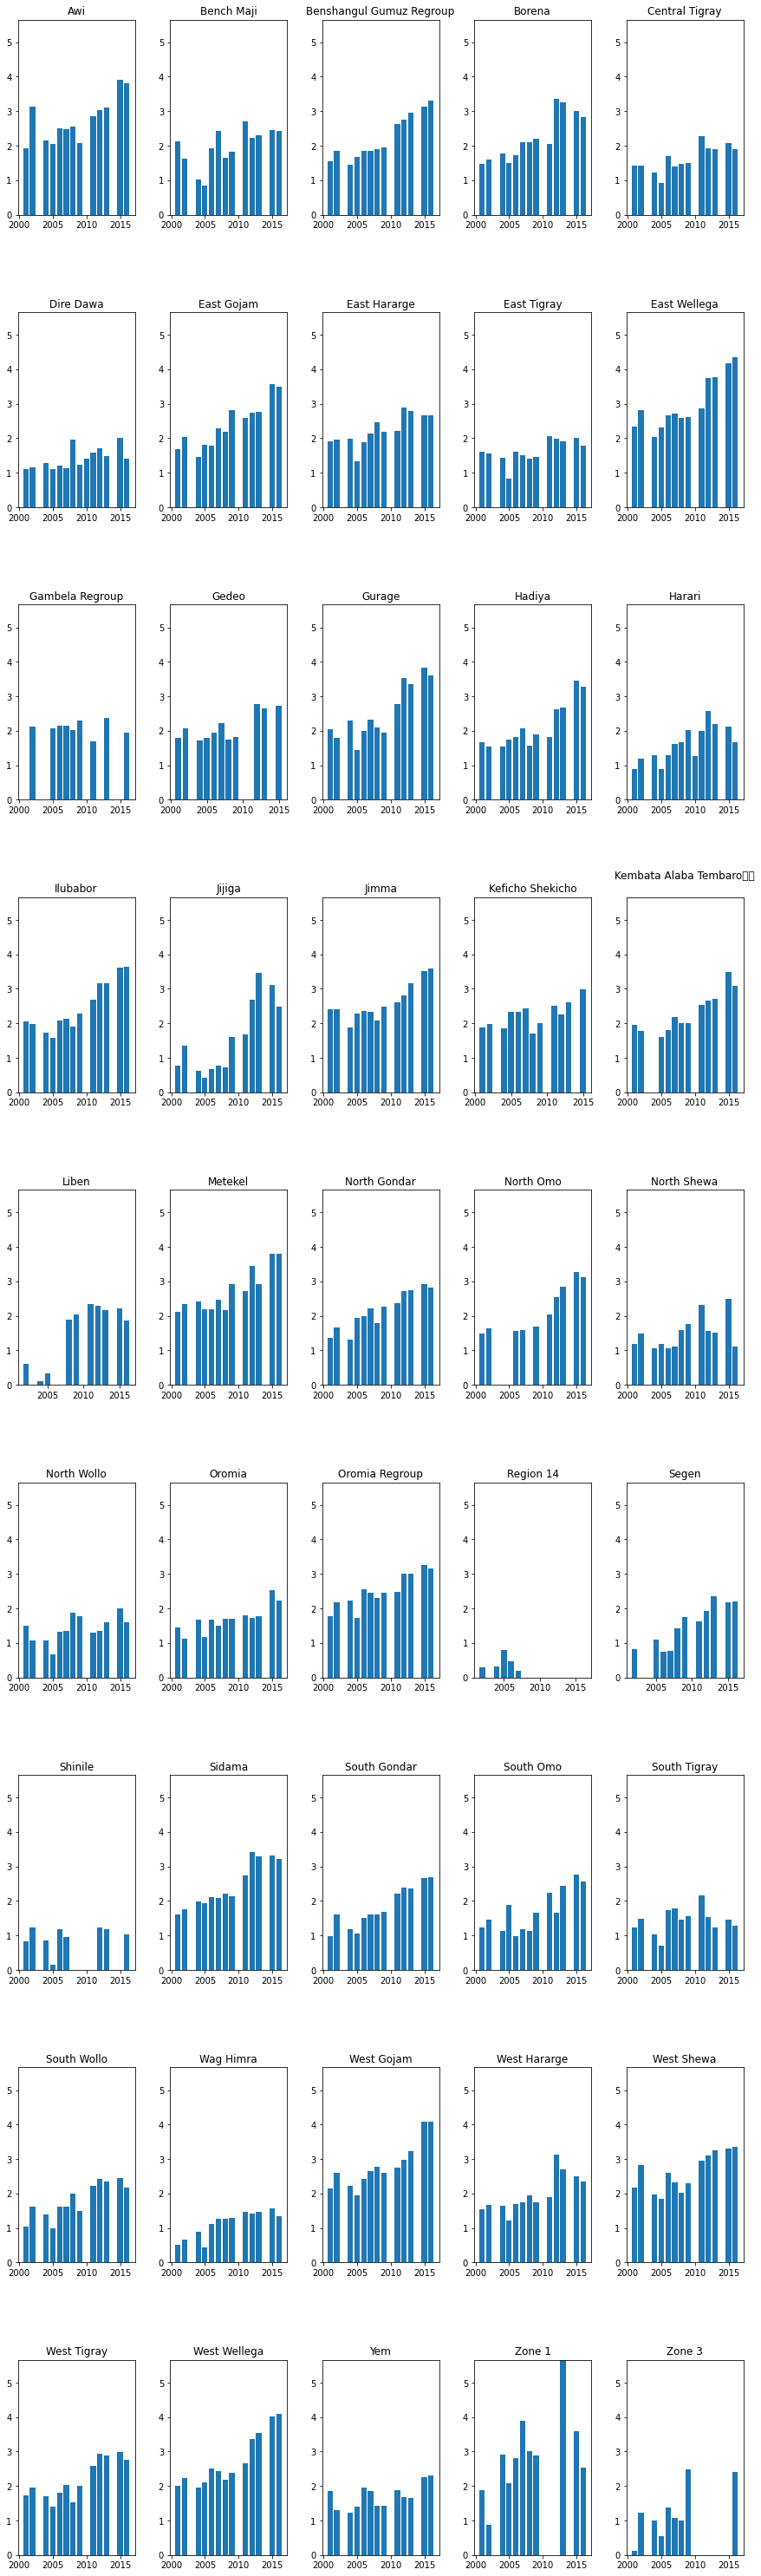

In [181]:
# Plot Meher yield for each zone over time

# Set up figure
fig = plt.figure(figsize=(15, 60))
nrows = len(set(eth["Admin2_mod"]))
ymax = eth["Yield_mt_ha"].max()

# Set up variable for recording how many years' data for each zone
n_years = []
eth_meher = eth[eth["Season"]=="Meher"].dropna(subset=["Admin2_mod"])

# Find unique zones
for i, zone in enumerate(sorted(set(eth_meher["Admin2_mod"]))):

  # Set up empty dataframe for yield values for every year
  df = pd.DataFrame(index=set(eth_meher["Year"]), columns=["Yield_mt_ha"], data=0)

  # Find all data for zone
  zone_data = eth_meher.loc[eth_meher["Admin2_mod"]==zone, :]

  # Record number of years for which there is data
  n_years.append(len(zone_data))

  # Put available data into empty dataframe
  for _, c in zone_data.iterrows():
    df.loc[c["Year"]] = c["Yield_mt_ha"]

  # Plot
  ax = fig.add_subplot(math.ceil(nrows/5), 5, i+1)
  ax.bar(df.index, df["Yield_mt_ha"])
  plt.ylim(0, ymax)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  plt.title(zone)


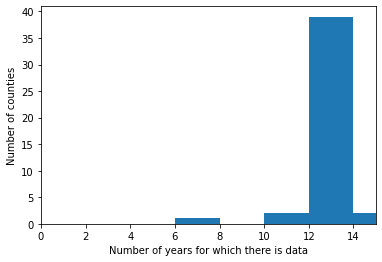

In [182]:
# Plot how much data for each county
plt.hist(n_years)
plt.xlabel('Number of years for which there is data')
plt.ylabel('Number of counties')
plt.xlim(0, len(set(eth_meher["Year"]))+1);

Text(0.5, 0, 'Harvest year')

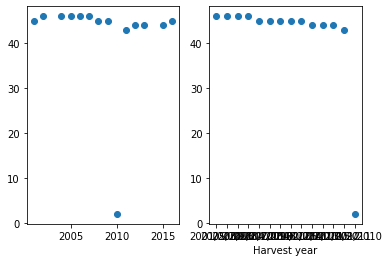

In [183]:
# Plot how much data for each year
_, (ax1, ax2) = plt.subplots(1, 2)
year = eth_meher["Year"].value_counts(dropna=False)
ax1.scatter(year.index, year)
plt.xlabel("Year")
year = eth_meher["DNL Original harvest year"].value_counts()
ax2.scatter(year.index, year)
plt.xlabel("Harvest year");

# Plot area of Ethiopia's zones compared to Senegal's regions and departments

,Zone,Area
0,"Hadiya, SNNP",3593.30
1,"Sidama, SNNP",10000.00
2,"South Omo, SNNP",21055.92
3,"Bench Maji, SNNP",19252.00
4,"Yem, SNNP",674.90


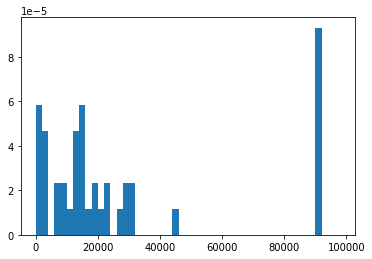

In [218]:
# Land area of zones in Ethiopia (data from Wikipedia)
eth_area = pd.DataFrame(columns=["Zone", "Area"])

eth_area = eth_area.append({"Zone": "Hadiya, SNNP", "Area": 3593.3}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Sidama, SNNP", "Area": 10000}, ignore_index=True)
eth_area = eth_area.append({"Zone": "South Omo, SNNP", "Area": 21055.92}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Bench Maji, SNNP", "Area": 19252}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Yem, SNNP", "Area": 674.90}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Gurage, SNNP", "Area": 3593.31}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Kembata Alaba Tembaro, SNNP", "Area": 2350.55}, ignore_index=True)
eth_area = eth_area.append({"Zone": "North Omo, SNNP", "Area": 29826.87}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Segen, SNNP", "Area": 6311.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Gedeo, SNNP", "Area": 1210.89}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Keficho Shekicho, SNNP", "Area": 12739.25}, ignore_index=True)

eth_area = eth_area.append({"Zone": "North Shewa, Amhara", "Area": 15936.13}, ignore_index=True)
eth_area = eth_area.append({"Zone": "North Gondar, Amhara", "Area": 45944.63}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Awi, Amhara", "Area": 9148.43}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Wag Himra, Amhara", "Area": 9039.04}, ignore_index=True)
eth_area = eth_area.append({"Zone": "East Gojam, Amhara", "Area": 14004.47}, ignore_index=True)
eth_area = eth_area.append({"Zone": "North Wollo, Amhara", "Area": 12172.5}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Oromia, Amhara", "Area": 3470.04}, ignore_index=True)
eth_area = eth_area.append({"Zone": "South Gondar, Amhara", "Area": 14095.19}, ignore_index=True)
eth_area = eth_area.append({"Zone": "South Wollo, Amhara", "Area": 17067.45}, ignore_index=True)
eth_area = eth_area.append({"Zone": "West Gojam, Amhara", "Area": 13311.94}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Harari", "Area": 311.25}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Metekel, Benshangul Gumuz", "Area": 26272.38}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Benshangul Gumuz regroup, Benshangul Gumuz", "Area": 23017.08}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Oromia regroup, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "North Shewa, Oromia", "Area": 15936.13}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Ilubabor, Oromia", "Area": 15135.33}, ignore_index=True)
eth_area = eth_area.append({"Zone": "West Shewa, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "West Hararge, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Jimma, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Borena, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "East Wellega, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "East Hararge, Oromia", "Area": 90463.73}, ignore_index=True)
eth_area = eth_area.append({"Zone": "West Wellega, Oromia", "Area": 90463.73}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Dire Dawa", "Area": 1213.00}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Zone 1, Afar", "Area": 30242.1}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Zone 3, Afar", "Area": 6594.18}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Gambela", "Area": 29782.82}, ignore_index=True)

eth_area = eth_area.append({"Zone": "East Tigray, Tigray", "Area": 13268.99}, ignore_index=True)
eth_area = eth_area.append({"Zone": "West Tigray, Tigray", "Area": 30648.46}, ignore_index=True)
eth_area = eth_area.append({"Zone": "Central Tigray, Tigray", "Area": 22133.87}, ignore_index=True)
eth_area = eth_area.append({"Zone": "South Tigray, Tigray", "Area": 18670.45}, ignore_index=True)

eth_area = eth_area.append({"Zone": "Addis Ababa", "Area": 527}, ignore_index=True)

plt.hist(eth_area["Area"], bins=range(0, 100000, 2000), density=True)
eth_area.head()

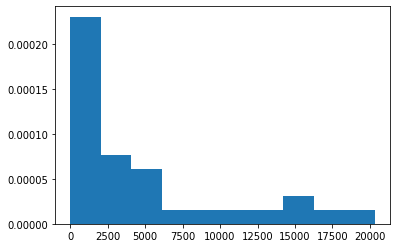

In [250]:
# Land area of regions in Senegal (data from Wikipedia)
sen_reg_area = pd.DataFrame(columns=["Region", "Area"])

sen_reg_area = sen_reg_area.append({"Region": "Dakar", "Area": 547}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Ziguinchor", "Area": 7352}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Diourbel", "Area": 4824}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Saint-Louis", "Area": 19241}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Tambacounda", "Area": 42364}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Kaolack", "Area": 5357}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Thiès", "Area": 6670}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Louga", "Area": 24889	}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Fatick", "Area": 6849}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Kolda", "Area": 13771}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Matam", "Area": 29445}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Kaffrine", "Area": 11262}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Kédougou", "Area": 16800}, ignore_index=True)
sen_reg_area = sen_reg_area.append({"Region": "Sédhiou", "Area": 7341}, ignore_index=True)

# Land area of departments in Senegal (data from Wikipedia)
sen_dep_area = pd.DataFrame(columns=["Dept", "Area"])

sen_dep_area = sen_dep_area.append({"Dept": "Dakar, Dakar Region", "Area": 79}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Guédiawaye, Dakar Region", "Area": 13}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Pikine, Dakar Region", "Area": 87}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Rufisque, Dakar Region", "Area": 372}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Bambey, Diourbel Region", "Area": 1351}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Diourbel, Diourbel Region", "Area": 1175}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Mbacké, Diourbel Region", "Area": 1833}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Fatick, Fatick Region", "Area": 2646}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Foundiougne, Fatick Region", "Area": 2959}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Gossas, Fatick Region", "Area": 1080}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Kaffrine, Kaffrine Region", "Area": 11102}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Guinguinéo, Kaolack Region", "Area": 1250}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Kaolack, Kaolack Region", "Area": 1880}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Nioro du Rip, Kaolack Region", "Area": 2277}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Kédougou, Kédougou Region", "Area": 16896}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Kolda, Kolda Region", "Area": 8284}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Vélingara, Kolda Region", "Area": 5434}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Kébémer, Louga Region", "Area": 3823}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Linguère, Louga Region", "Area": 15375}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Louga, Louga Region", "Area": 5649}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Dagana, Saint-Louis Region", "Area": 5208}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Podor, Saint-Louis Region", "Area": 12947}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Saint-Louis, Saint-Louis Region", "Area": 879}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Bakel, Tambacounda Region", "Area": 6290}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Goudiry, Tambacounda Region", "Area": 16090}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Tambacounda, Tambacounda Region", "Area": 20328}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "M'bour, Thiès Region", "Area": 1607}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Thiès, Thiès Region", "Area": 1873}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Tivaouane, Thiès Region", "Area": 3121}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Bignona, Ziguinchor Region", "Area": 5295}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Oussouye, Ziguinchor Region", "Area": 891}, ignore_index=True)
sen_dep_area = sen_dep_area.append({"Dept": "Ziguinchor, Ziguinchor Region", "Area": 1153}, ignore_index=True)

plt.hist(sen_dep_area["Area"], density=True);

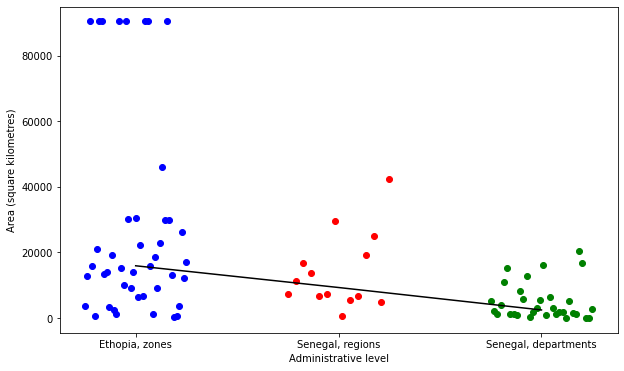

In [274]:
# Plot distribution of areas

fig = plt.figure(figsize=(10, 6))

xjitter = np.linspace(0.75, 1.25, len(eth_area))
plt.scatter(xjitter[np.random.permutation(len(xjitter))], eth_area["Area"], color='b')

xjitter = np.linspace(1.75, 2.25, len(sen_reg_area))
plt.scatter(xjitter[np.random.permutation(len(xjitter))], sen_reg_area["Area"], color='r')

xjitter = np.linspace(2.75, 3.25, len(sen_dep_area))
plt.scatter(xjitter[np.random.permutation(len(xjitter))], sen_dep_area["Area"], color='g')

plt.plot([1, 2, 3], [eth_area["Area"].median(), sen_reg_area["Area"].median(), sen_dep_area["Area"].median()], color='k')

plt.xlabel('Administrative level')
plt.ylabel("Area (square kilometres)")
plt.xticks([1, 2, 3], ["Ethopia, zones", "Senegal, regions", "Senegal, departments"]);